Accuracy of Decision Tree on white_wine_30: 0.9027210884353741
Cross-validation scores: [0.91122449 0.88877551 0.89897959 0.86108274 0.8845761 ]
Average cross-validation score: 0.8889276854766421


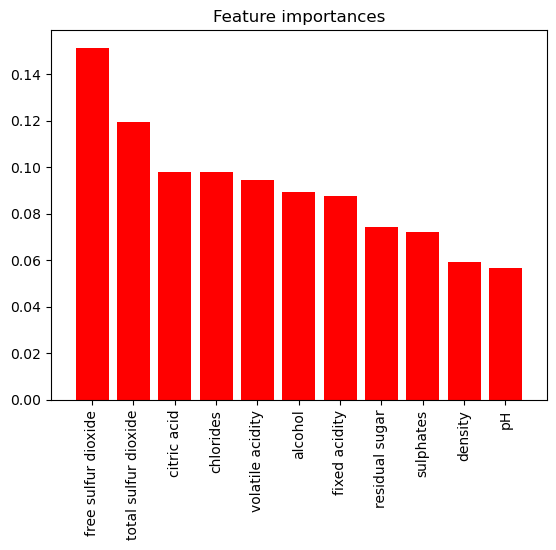

Accuracy of Decision Tree on white_wine_20: 0.8938775510204081
Cross-validation scores: [0.8877551  0.87244898 0.86530612 0.8804903  0.87640449]
Average cross-validation score: 0.8764809989368578


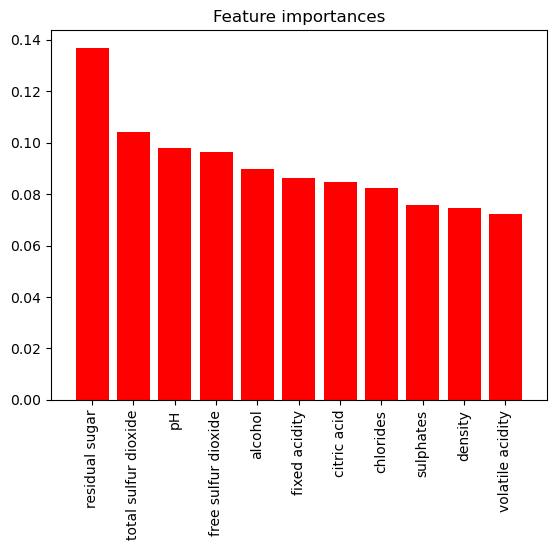

Accuracy of Decision Tree on red_wine_10: 0.875
Cross-validation scores: [0.903125  0.91875   0.9       0.903125  0.9184953]
Average cross-validation score: 0.9086990595611285


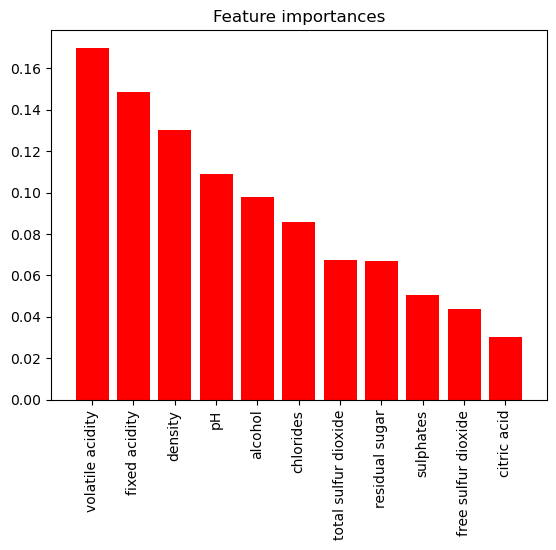

Accuracy of Decision Tree on red_wine_30: 0.9270833333333334
Cross-validation scores: [0.903125   0.93125    0.925      0.921875   0.92789969]
Average cross-validation score: 0.9218299373040754


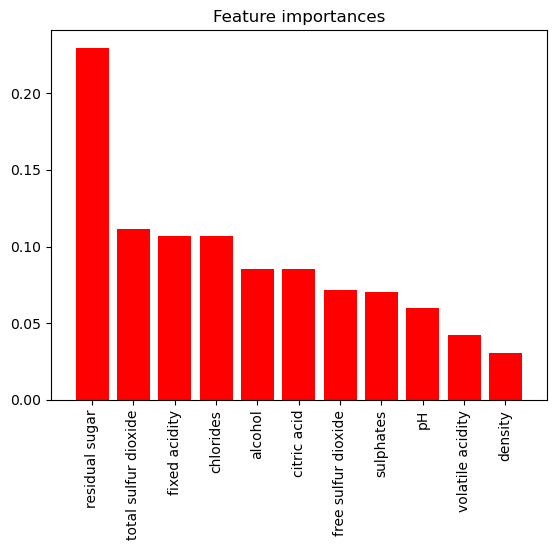

Accuracy of Decision Tree on red_wine_20: 0.9229166666666667
Cross-validation scores: [0.903125   0.896875   0.9        0.884375   0.90595611]
Average cross-validation score: 0.8980662225705329


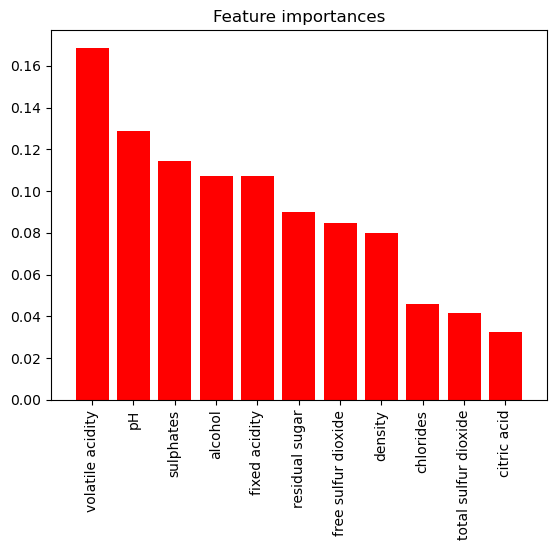

Accuracy of Decision Tree on white_wine_10: 0.9027210884353741
Cross-validation scores: [0.87040816 0.84387755 0.87346939 0.8804903  0.89581205]
Average cross-validation score: 0.8728114902753747


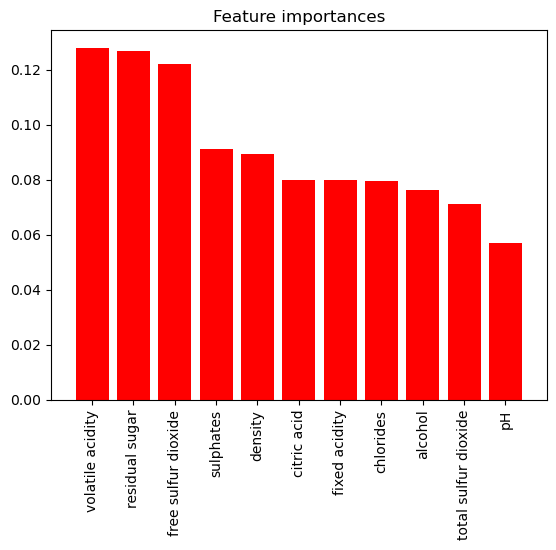

In [29]:
import DataHandler as dh
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import graphviz
from sklearn import tree
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

datasets = dh.read_data("data/removed")

for dataset_name, df in datasets.items():
    X = df.iloc[:, :-1]
    
    y = df.iloc[:, -1]
    bins = [0, 4, 7, 10]
    labels = [1, 2, 3]
    y = pd.cut(y, bins=bins, labels=labels)

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    clf = DecisionTreeClassifier(random_state=42)

    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)

    print(f"Accuracy of Decision Tree on {dataset_name}: {accuracy}")

    scores = cross_val_score(clf, X, y, cv=5)
    print(f"Cross-validation scores: {scores}")
    print(f"Average cross-validation score: {scores.mean()}")

    importances = clf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure()
    plt.title("Feature importances")
    plt.bar(range(X.shape[1]), importances[indices], color="r", align="center")
    plt.xticks(range(X.shape[1]), X.columns[indices], rotation='vertical')
    plt.xlim([-1, X.shape[1]])
    plt.show()

    class_names = [str(i) for i in sorted(y.unique())]
    dot_data = tree.export_graphviz(clf, out_file=None, feature_names=X.columns, class_names=class_names, filled=True, rounded=True)
    graph = graphviz.Source(dot_data)
    graph

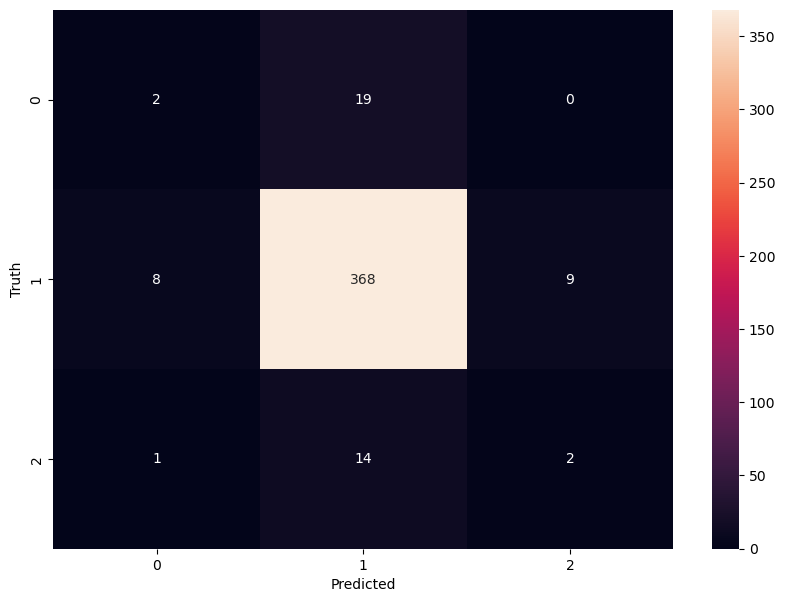

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')
plt.show()